In [3]:
from test import testbed
from datetime import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

import numpy as np

pd.plotting.register_matplotlib_converters()

In [4]:
data = testbed(asset='ETH-USD',start=dt(2020,9,1),stop=dt(2020,9,30),hrm='all',interval='1minute',F=368896,mode='dump',m=1,refresh=0.5)


Starting dump run for date range 2020-09-01 00:00:00 - 2020-09-30 00:00:00 @interval=1minute


Data acquired. Total data points:41655

Creating Parameter system of order:3...

Parameters are ready...

- Creating addtional features...

Data modelling complete...



TypeError: _fftn_dispatcher() missing 1 required positional argument: 'a'

In [ ]:
data.columns.values

array(['x1', 'dotx1', 'ddotx1', 'xg1', 'xp1', 'ma1', 'ft1', 'ff1', 'te1',
       'ed1', 'pe1', 'ke1', 'wrk1', 'pwr1', 'w1o', 'w1', 'a1', 'k1',
       'dr1', 'zeta1', 'q1', 'rf1', 'thd1', 'x2', 'dotx2', 'ddotx2',
       'xg2', 'xp2', 'ma2', 'ft2', 'ff2', 'te2', 'ed2', 'pe2', 'ke2',
       'wrk2', 'pwr2', 'w2o', 'w2', 'a2', 'k2', 'dr2', 'zeta2', 'q2',
       'rf2', 'thd2', 'Pe', 'Ke', 'He', 'Le', 'Mam', 'Maa', 'Mat', 'Ftm',
       'Fta', 'Ftt', 'Ffm', 'Ffa', 'Fft', 'Pwm', 'Pwa', 'Pwt', 'Wkm',
       'Wka', 'Wkt', 'Trq', 'Thd', 'Spd', 'pos', 'posa'], dtype=object)

In [ ]:
sys = data.iloc[:,data.columns.get_loc('Pe'):]
sig1 = data.iloc[:,data.columns.get_loc('x1'):data.columns.get_loc('x2')].join(sys_s.pos)
sig2 = data.iloc[:,data.columns.get_loc('x2'):data.columns.get_loc('Pe')].join(sys_s.pos)

In [ ]:
print('p(1):',100*(data.pos.value_counts()[1]/data.x1.size)
        ,'p(0):',100*data.pos.value_counts()[0]/data.x1.size
)

p(1): 49.87270631184552 p(0): 50.12729368815448


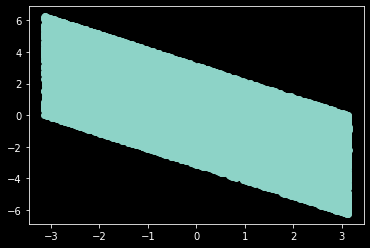

In [ ]:
ang = np.angle(np.fft.fft(sig1.x1))
dang = pd.Series(ang).shift(-1) - ang
plt.scatter(ang,dang)

### MULTI LAYER PERCEPTRON

In [ ]:
lab = np.array(sig1.pos)
sig1 = sig1.drop('pos',axis=1)
sig2 = sig2.drop('pos',axis=1)
sys_s = sys.drop('pos',axis=1)

In [ ]:
mod  = sm.OLS(lab,sys_s)

res = mod.fit()

print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.472
Model:                            OLS   Adj. R-squared (uncentered):              0.472
Method:                 Least Squares   F-statistic:                              1859.
Date:                Wed, 13 Oct 2021   Prob (F-statistic):                        0.00
Time:                        14:45:43   Log-Likelihood:                         -31308.
No. Observations:               41636   AIC:                                  6.266e+04
Df Residuals:                   41616   BIC:                                  6.283e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

ValueError: Joining multiple DataFrames only supported for joining on index

In [7]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import zero_one_loss, accuracy_score, precision_score, mean_absolute_error, mean_squared_error,roc_auc_score, explained_variance_score
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

tscv = TimeSeriesSplit(n_splits=5)

X1 = np.array(sig1)
X2 = np.array(sig2)
Xs = sys_s

X = np.float32(Xs)
Y = np.float32(lab)

for train_index, test_index in tscv.split(X):
    s = train_index
    t = test_index
xtrain, xtest = X[s], X[t]
ytrain, ytest = Y[s], Y[t]

### Best Parameters :  {'activation': 'tanh', 'hidden_layer_sizes': (15, 15), 'learning_rate': 'constant', 'solver': 'adam'}

In [8]:
clf = MLPClassifier(random_state=123
                    ,verbose=True
                    ,warm_start=True
                    ,activation='tanh'
                    ,learning_rate='constant'
                    ,solver='adam'
                    ,shuffle=False
                    ,hidden_layer_sizes=(15,15,)
                    )

clf.fit(xtrain,ytrain)

Iteration 1, loss = 0.59353846
Iteration 2, loss = 0.56303857
Iteration 3, loss = 0.54900087
Iteration 4, loss = 0.53410381
Iteration 5, loss = 0.51137311
Iteration 6, loss = 0.47521621
Iteration 7, loss = 0.42590947
Iteration 8, loss = 0.37229793
Iteration 9, loss = 0.32384597
Iteration 10, loss = 0.28377621
Iteration 11, loss = 0.25138847
Iteration 12, loss = 0.22519266
Iteration 13, loss = 0.20374748
Iteration 14, loss = 0.18592908
Iteration 15, loss = 0.17093989
Iteration 16, loss = 0.15819864
Iteration 17, loss = 0.14727011
Iteration 18, loss = 0.13780126
Iteration 19, loss = 0.12953364
Iteration 20, loss = 0.12224013
Iteration 21, loss = 0.11576521
Iteration 22, loss = 0.10996616
Iteration 23, loss = 0.10474181
Iteration 24, loss = 0.10000243
Iteration 25, loss = 0.09567711
Iteration 26, loss = 0.09170551
Iteration 27, loss = 0.08803710
Iteration 28, loss = 0.08462927
Iteration 29, loss = 0.08144626
Iteration 30, loss = 0.07845817
Iteration 31, loss = 0.07564026
Iteration 32, los

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15, 15), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=123, shuffle=False, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=True)

In [9]:
# %%time

# from sklearn.model_selection import GridSearchCV

# params = {'activation': ['relu', 'tanh', 'logistic', 'identity'],
#           'hidden_layer_sizes': [(15,), (15,15,), (15,15,15,)],
#           'solver': ['adam', 'sgd', 'lbfgs'],
#           'learning_rate' : ['constant', 'adaptive', 'invscaling'],
#           'random_state': [None,0,123]
#          }

# mlp_classif_grid = GridSearchCV(MLPClassifier(random_state=123), param_grid=params, n_jobs=-1, cv=5, verbose=5)
# mlp_classif_grid.fit(xtrain,ytrain)

# print('Train Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(xtrain, ytrain))
# print('Test Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(xtest, ytest))
# print('Best Accuracy Through Grid Search : %.3f'%mlp_classif_grid.best_score_)
# print('Best Parameters : ',mlp_classif_grid.best_params_)

In [10]:
def plot_confusion_matrix(ytest, ypred):
    conf_mat = confusion_matrix(ytest, ypred)
    print(conf_mat)
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(2), range(2))
    plt.xticks(range(2), range(2))
    plt.colorbar();
    for i in range(2):
        for j in range(2):
            plt.text(i-0.2,j+0.1, str(conf_mat[j, i]), color='tab:red')

In [11]:
print("Number of Coefs : ", len(clf.coefs_))

print([weights.shape for weights in clf.coefs_])

print("Number of Intercepts : ", len(clf.intercepts_))

print([intercept.shape for intercept in clf.intercepts_])

print("Number of Iterations for Which Estimator Ran : ", clf.n_iter_)

print("Name of Output Layer Activation Function : ", clf.out_activation_)

Number of Coefs :  3
[(23, 15), (15, 15), (15, 1)]
Number of Intercepts :  3
[(15,), (15,), (1,)]
Number of Iterations for Which Estimator Ran :  106
Name of Output Layer Activation Function :  logistic


In [43]:
s = 100

xtest_s = xtest[-s:].reshape(s,-1)
ytest_s = ytest[-s:].reshape(s,-1)
ypred = clf.predict(xtest_s)

zol_tp = zero_one_loss(ytest_s, ypred)
acc = accuracy_score(ytest_s,ypred)
prec = precision_score(ytest_s,ypred)
mse = mean_squared_error(ytest_s,ypred)
mae = mean_absolute_error(ytest_s,ypred)
exv = explained_variance_score(ytest_s,ypred)
roc = 0 #roc_auc_score(ytest_s,ypred)

print(
    'training mean acc:',clf.score(xtrain,ytrain)
    ,'\ntesting mean acc:',clf.score(xtest,ytest),'\naccuracy:',acc ,'\nroc auc score:',roc,'\nprecision:',prec
    , '\nexplained var:',exv, '\nzero one loss:',zol_tp,'\nmean sqr err:',mse,'\nmean abs err:',mae
    )

training mean acc: 0.9920454217943915 
testing mean acc: 0.9894797521256665 
accuracy: 1.0 
roc auc score: 0 
precision: 1.0 
explained var: 1.0 
zero one loss: 0.0 
mean sqr err: 0.0 
mean abs err: 0.0


<BarContainer object of 100 artists>

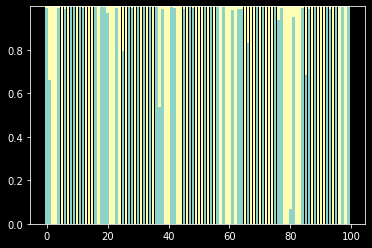

In [44]:
predpro = clf.predict_proba(xtest_s)

plt.bar(np.arange(len(predpro)),predpro[:,0],label='p0')
plt.bar(np.arange(len(predpro)),predpro[:,1],label='p1',bottom=predpro[:,0])

[[50  0]
 [ 0 50]]


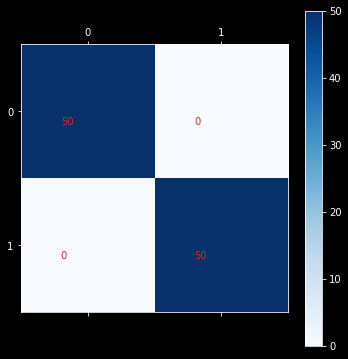

In [45]:
plot_confusion_matrix(ytest_s, ypred)